**DATA WOLVES**







<div align= "center"><img src="https://media.giphy.com/media/2K6BgAt55My7vfN3Hy/giphy.gif"></div>


 - Cristina Farruku 5105980
 - Brian Ramiro Bolivar Arias 5111964
 - Giovanni Barnaba 5105703

AG's news Topic Classification dataset is constructed by choosing 4 largest classes from the original corpus composed of 1 milion articles. 
Each class contains 30000 training samples and 1900 testing samples summing to a total number of training sample of 120000 and testing sample of 7600.
The main purposes of our analysis are:
1.   Through the Topic Modelling methods, we constructed class clusters to compare them to the true categories that we have. 
2.   Use one Neural Network model to classify the data.
3.   Use a Transformer based\Language Model model to classify the data.


In [ ]:
import pandas as pd
import numpy as np

# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

import re, string

import nltk
nltk.download('punkt')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Matplotlib version:  3.2.2


#Exploratory Data Analysis

Load the dataset from the github link

In [ ]:
url_test = 'https://media.githubusercontent.com/media/nluninja/nlp_datasets/main/ag_news/data/test.csv'
url_train = 'https://media.githubusercontent.com/media/nluninja/nlp_datasets/main/ag_news/data/train.csv'

df_train = pd.read_csv(url_train, header=None, engine = 'python')
df_test = pd.read_csv(url_test, header=None, engine = 'python')

#add labels to columns
df_train.rename(columns={0:"Topic", 1:"Title", 2:"Description"}, inplace= True)
df_test.rename(columns={0:"Topic", 1:"Title", 2:"Description"}, inplace= True)

In [ ]:
#overview of the dataframe
df_train.head()

,Topic,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's check if there are missing or duplicated values 

In [ ]:
#check for missing values
df_train.isnull().sum()

Topic          0
Title          0
Description    0
dtype: int64

as we can see there are no missing values in all the columns

In [ ]:
# check the duplicated data
df_train.duplicated().sum()

0

there are no repetitions too

### Is the Dataset Balanced or Imbalanced?

check if the dataset is balanced over the four classes, since the fact that an imabalce dataset could be a probelm during the analysis.

In [ ]:
total_train = {'Topics' : ['World', 'Sport', 'Business', 'Sci-Tech'], 'Total' : [df_train['Topic'].isin([1]).sum(), df_train['Topic'].isin([2]).sum(),
           df_train['Topic'].isin([3]).sum(), df_train['Topic'].isin([4]).sum()]}
df_total_train = pd.DataFrame(total_train)
df_total_train

,Topics,Total
0,World,30000
1,Sport,30000
2,Business,30000
3,Sci-Tech,30000


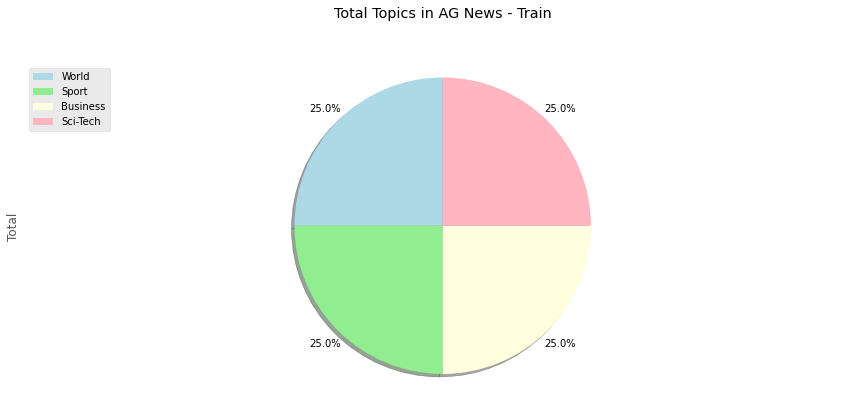

In [ ]:
colors_list = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink']

df_total_train['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list  # add custom colors
                            )

# scale the title up by 12% to match pctdistance
plt.title('Total Topics in AG News - Train', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=['World', 'Sport', 'Business', 'Sci-Tech'], loc='upper left') 

plt.show()

The pie chart and the table above show a perfectly balanced dataset over the four classes. 

### Word Clouds Using Unprocessed Text

Let's have a quick overview of the words in each topic through the use of word clouds, in ordert to visually detect if there are abnormal words.

In [ ]:
#Create a new column which contains Title and Description 
df_train['Title + Description'] = df_train['Title'] + pd.DataFrame({'Spaces': [' ' for i in range(len(df_train.index))]})['Spaces'] + df_train['Description']
df_test['Title + Description'] = df_test['Title'] + pd.DataFrame({'Spaces': [' ' for i in range(len(df_train.index))]})['Spaces'] + df_test['Description']

In [ ]:
# set the random state
random_state = 2022

# import the wordcloud library
from wordcloud import WordCloud

# concat all the text for each labels
world_text_train = [''.join(t) for t in df_train[df_train['Topic']==1]['Title + Description']]
world_text_train_strings = ' '.join(map(str, world_text_train))

sport_text_train = [''.join(t) for t in df_train[df_train['Topic']==2]['Title + Description']]
sport_text_train_strings = ' '.join(map(str, sport_text_train))

business_text_train = [''.join(t) for t in df_train[df_train['Topic']==3]['Title + Description']]
business_text_train_strings = ' '.join(map(str, business_text_train))

scitech_text_train = [''.join(t) for t in df_train[df_train['Topic']==4]['Title + Description']]
scitech_text_train_strings = ' '.join(map(str, scitech_text_train))

# generate word clouds
world_cloud = WordCloud(width=800, height=400, max_words=1000,
                        background_color='white', 
                        random_state=random_state).generate(world_text_train_strings)
sport_cloud = WordCloud(width=800, height=400, max_words=1000, 
                        background_color='white',
                        random_state=random_state).generate(sport_text_train_strings)
business_cloud = WordCloud(width=800, height=400, max_words=1000, 
                           background_color='white', 
                           random_state=random_state).generate(business_text_train_strings)
scitech_cloud = WordCloud(width=800, height=400, max_words=1000, 
                          background_color='white', 
                          random_state=random_state).generate(scitech_text_train_strings)

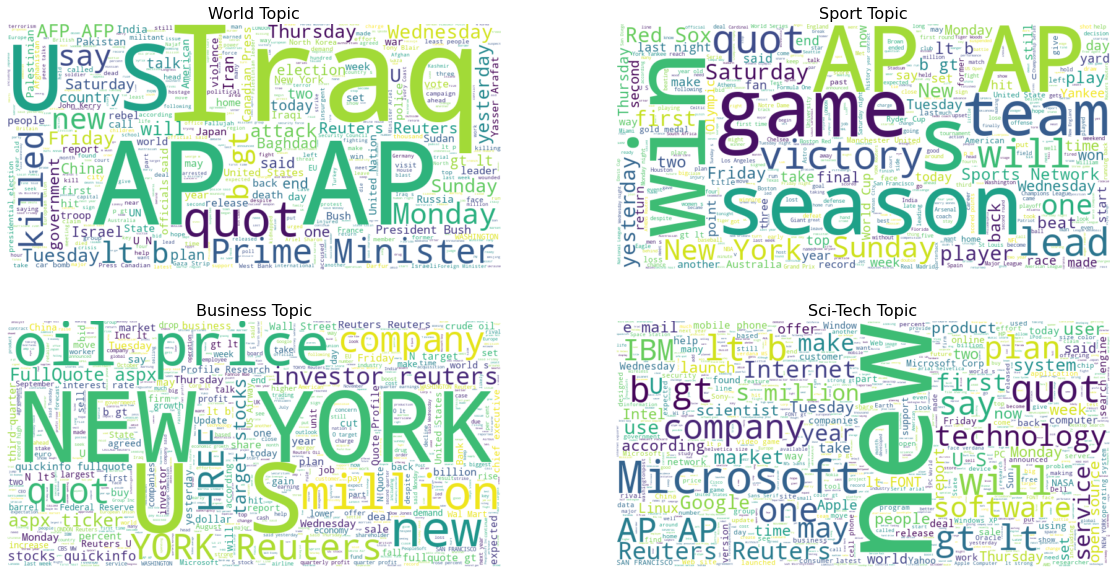

In [ ]:
# create subplots for the generated clouds
fig, axes = plt.subplots(2, 2, figsize = (20,10))
axes[0,0].imshow(world_cloud, interpolation='bilinear')
axes[0,1].imshow(sport_cloud, interpolation='bilinear')
axes[1,0].imshow(business_cloud, interpolation='bilinear')
axes[1,1].imshow(scitech_cloud, interpolation='bilinear')

# turn the axis off
[ax.axis('off') for ax in axes.ravel()]

# add titles
axes[0,0].set_title('World Topic', fontsize=16)
axes[0,1].set_title('Sport Topic', fontsize=16)
axes[1,0].set_title('Business Topic', fontsize=16)
axes[1,1].set_title('Sci-Tech Topic', fontsize=16)

# show the figure
plt.show()

From these simple representations we can easily detect meaningless recurring words like "AP", "AFP" and "Reuters".

##Text Preprocessing
---

### Remove sources

The most frequent identified sources: 
* [AP](https://apnews.com) - Assosiated Press News 
* [AFP](https://www.afp.com/en/news-hub) - Agence France-Presse
* [Reuters](https://www.reuters.com/)

In [ ]:
# define a function that removes AP and AFP from the text
def remove_sources(text):
    text = re.sub(r'AP', '', text)
    text = re.sub(r'AFP', '', text)
    text = re.sub(r'Reuters', '', text)
    return text

# remove URLs from the text and show the modified text in a new column
df_train['Text Cleaned'] = df_train['Title + Description'].apply(remove_sources)
df_test['Text Cleaned'] = df_test['Title + Description'].apply(remove_sources)

###Remove links

We saw that some links are present in the dataset, for the analysis links are not useful.

In [ ]:
#links counter
df_train['Description'][df_train.Description.str.contains('http')].count()

1791

In [ ]:
#print some of them
df_train['Description'][df_train.Description.str.contains('http')].tail()

119394     NEW YORK (Reuters) - U.S. stocks closed lower...
119415     NEW YORK (Reuters) - American Express &lt;A H...
119447     SAN FRANCISCO (Reuters) - Apple Computer Inc....
119570     DETROIT (Reuters) - DaimlerChrysler AG &lt;A ...
119978     CHICAGO (Reuters) - Wal-Mart Stores Inc. &lt;...
Name: Description, dtype: object

In [ ]:
#visualize an example
df_train['Description'][119394]

' NEW YORK (Reuters) - U.S. stocks closed lower on Friday,  weighed down by a number of negative reports from top drug  makers, including Pfizer Inc. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=PFE.N target=/stocks/quickinfo/fullquote"&gt;PFE.N&lt;/A&gt;, and a \\$2 jump in the  price of crude oil.'

In [ ]:
# define a function that removes links from the text
def remove_links(text):
    text = re.sub(r'(("https?|ftp|file)://[-\w\d+=&@#/%?~|!:;\.,]*")', '', text)
    return text

# remove URLs from the text and show the modified text in a new column
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_links)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_links)

###Remove letters

From the previous word clouds we identified some meaningless characters 

In [ ]:
# visualize the count of meaningless characters
print( 'lt: ', df_train['Description'][df_train.Description.str.contains(' lt')].count())
print( 'gt: ', df_train['Description'][df_train.Description.str.contains(' gt')].count())
print( 'b: ', df_train['Description'][df_train.Description.str.contains(' b ')].count())

lt:  4
gt:  34
b:  4


In [ ]:
# some examples
print('----- lt -----\n', df_train['Description'][df_train.Description.str.contains(' lt')].tail())
print('----- gt -----\n', df_train['Description'][df_train.Description.str.contains(' gt')].tail())
print('----- b -----\n', df_train['Description'][df_train.Description.str.contains(' b ')].tail())

----- lt -----
 15798     Toshiba Corporation ( quot;Toshiba quot;) and ...
26022     Japan #39;s Suzuki Motor Corp.  lt;7269.T gt; ...
106732    The Dow Jones industrial average  lt;.DJI gt; ...
119300    NTT DoCoMo used its proprietary signal separat...
Name: Description, dtype: object
----- gt -----
 98190     CQ quot; gt; Walt Disney Company shareholders ...
103251    Sports India: Cricket  gt; Kolkata, Nov 28 : S...
106732    The Dow Jones industrial average  lt;.DJI gt; ...
112874    World News  gt; Dhaka, Dec 10 : A Bangladeshi ...
118658    India News  gt; Hyderabad, Dec 16 : A species ...
Name: Description, dtype: object
----- b -----
 11028    Intel Thursday unveiled tri-mode Centrino tech...
11448    Intel announced a new tri-mode wireless module...
11932    CHIP FIRM Intel said it had released support f...
56646    Ziff Davis - Symbol's 'access port' will suppo...
Name: Description, dtype: object


In [ ]:
# define a function that removes meaningless characters
def remove_letters(text):
    text = re.sub(r' lt ', '', text)
    text = re.sub(r' gt ', '', text)
    text = re.sub(r' b ', '', text)
    return text

df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_letters)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_letters)

###Remove HTML tags

In [ ]:
# define a function that removes HTML tags
def remove_HTML(text):
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'HREF', '', text)   # The HTML code used to create a link to another page
  return text

# remove HTML tags
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_HTML)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_HTML)

###Remove Numeric Values

In [ ]:
# define a function that removes numeric values and mixtures
def remove_num(text):
    text = re.sub(r'\w*\d+\w*', '', text)
    return text

# remove numeric values and mixtures
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_num)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_num)

###Remove Symbols



In [ ]:
# define a function that removes symbols like & - \
def remove_symbols(text):
    text = re.sub(r'&[a-zA-Z]+;?', '', text)
    text = re.sub(r'[a-zA-Z]/[a-zA-Z]', '', text)
    text = text.replace("-", "")
    text = text.replace(".", "")
    text = text.replace("\\", " ") 
    text = text.replace("(", "")
    text = text.replace(")", "")  
    text = text.replace(",", "")
    text = text.replace("'", "")
    return text

# remove symbols from the text and show the modified text in a new column
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_symbols)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_symbols)

###Remove Non-printable Characters

In [ ]:
# define a function that removes non-printable characters
def remove_non_printable(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# remove non-printable characters
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_non_printable)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_non_printable)

###Lemmatization:
It is a Text Normalization Technique that takes into consideration the morphological analysis of the words with the use of a vocabulary in order to convert the words to their root base form, called lemmas.

In [ ]:
# lemmatize the text
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(lambda x:' '.join([t.lemma_ for t in nlp(x)]))
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(lambda x:' '.join([t.lemma_ for t in nlp(x)]))

### Preprocessing with Bow, consists of 2 steps:


#### 1st step --> convert the sentences to lowercase. It helps to get rid of unhelpful parts of the data.

In [ ]:
# lowercase the text
df_train['Text Cleaned'] = [t.lower() for t in df_train['Text Cleaned'] ]
df_test['Text Cleaned']  = [t.lower() for t in df_test['Text Cleaned'] ]

#### 2nd step --> remuval of stopwords: kind of tokens extremely common, such as  articles, conjuctions or pronouns, ect.


In [ ]:
# define a function that removes stopwords
def remove_stopwords(text):
  stopwords = nlp.Defaults.stop_words
  text_nostop = ' '.join([token for token in text.split() if token not in stopwords])
  return text_nostop

df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_stopwords)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_stopwords)

###Remove Punctuation

In [ ]:
import re, string
# define a function to remove punctuation
def remove_punct(text):
    punct = string.punctuation
    text_nospunct = ' '.join([token for token in text.split() if token not in punct])
    return text_nospunct

# remove punctuation
df_train['Text Cleaned'] = df_train['Text Cleaned'].apply(remove_punct)
df_test['Text Cleaned'] = df_test['Text Cleaned'].apply(remove_punct)

### Check the processed text

In [ ]:
#check the results
df_train[['Title + Description', 'Text Cleaned']].head()

,Title + Description,Text Cleaned
0,Wall St. Bears Claw Back Into the Black (Reute...,wall st bears claw black shortsellers wall str...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle look commercial aerospace private inve...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stocks outlook soar crude pr...
3,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halts oil exports main southern pipeline ...
4,"Oil prices soar to all-time record, posing new...",oil price soar alltime record pose new menace ...


In [ ]:
df_test['Text Cleaned']

0       fear t n pension talk unions represent worker ...
1       race second private team set launch date human...
2       ky company win grant study peptides company fo...
3       prediction unit help forecast wildfire barely ...
4       calif aims limit farmrelated smog southern cal...
                              ...                        
7595    world ukrainian presidential candidate viktor ...
7596    void fill clement supply attractive pitching o...
7597    martinez leave bitter like roger clemens exact...
7598    arthritis patient singapore bextra celebrex b ...
7599    ebay rental ebay plan buy apartment home renta...
Name: Text Cleaned, Length: 7600, dtype: object

####Raw vs. Preprocessed Text with Word Clouds



In [ ]:
# concat all the preprocessed text for both labels
word_processed = [''.join(t) for t in df_train[df_train['Topic']==1]['Text Cleaned']]
word_processed_s = ' '.join(map(str, word_processed))

sport_processed = [''.join(t) for t in df_train[df_train['Topic']==2]['Text Cleaned']]
sport_processed_s = ' '.join(map(str, sport_processed))

business_processed = [''.join(t) for t in df_train[df_train['Topic']==3]['Text Cleaned']]
business_processed_s = ' '.join(map(str, business_processed))

scitech_processed = [''.join(t) for t in df_train[df_train['Topic']==4]['Text Cleaned']]
scitech_processed_s = ' '.join(map(str, scitech_processed))

# generate word clouds of the preprocessed text
word_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(word_processed_s)
sport_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(sport_processed_s)
business_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(business_processed_s)
scitech_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(scitech_processed_s)

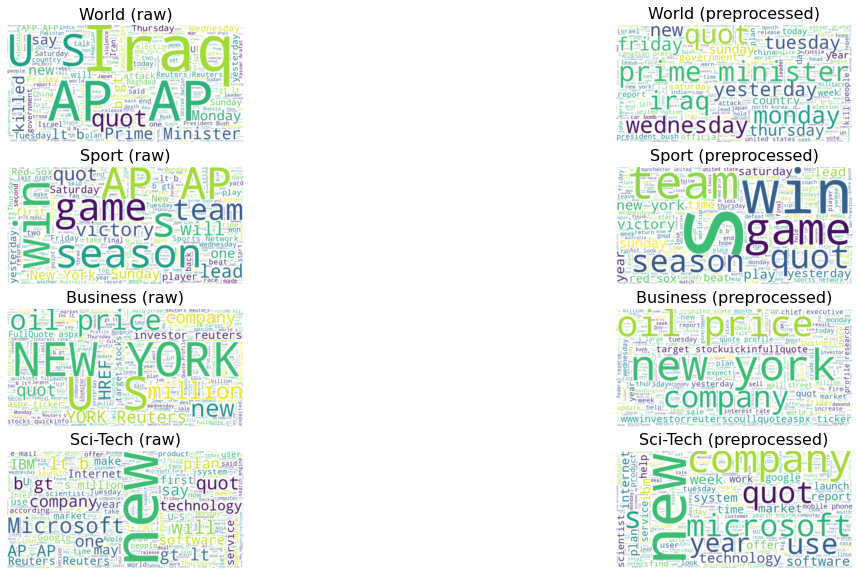

In [ ]:
# create subplots for the generated clouds
fig, axes = plt.subplots(4, 2, figsize = (20,10))
axes[0,0].imshow(world_cloud, interpolation='bilinear')
axes[0,1].imshow(word_processed_wc, interpolation='bilinear')
axes[1,0].imshow(sport_cloud, interpolation='bilinear')
axes[1,1].imshow(sport_processed_wc, interpolation='bilinear')
axes[2,0].imshow(business_cloud, interpolation='bilinear')
axes[2,1].imshow(business_processed_wc, interpolation='bilinear')
axes[3,0].imshow(scitech_cloud, interpolation='bilinear')
axes[3,1].imshow(scitech_processed_wc, interpolation='bilinear')
# turn the axis off
[ax.axis('off') for ax in axes.ravel()]

# add titles
axes[0,0].set_title('World (raw)', fontsize=16)
axes[0,1].set_title('World (preprocessed)', fontsize=16)
axes[1,0].set_title('Sport (raw)', fontsize=16)
axes[1,1].set_title('Sport (preprocessed)', fontsize=16)
axes[2,0].set_title('Business (raw)', fontsize=16)
axes[2,1].set_title('Business (preprocessed)', fontsize=16)
axes[3,0].set_title('Sci-Tech (raw)', fontsize=16)
axes[3,1].set_title('Sci-Tech (preprocessed)', fontsize=16)

# show the figure
plt.show()

##Feature Engineering

Below there are the 6 most relevant features created in order to compare the topics' distributions and 
"Title + Description" distributions:

* Number of sentences
* Number of words
* Number of characters
* Average length of words
* Number of proper nouns (PROPN)
* Number of non-proper nouns (NOUN)

###Number of Sentences

In [ ]:
# create a new feature for the number of sentences in each Tweet
df_train['sent_count'] = df_train['Title + Description'].apply(nltk.tokenize.sent_tokenize).apply(len)
df_test['sent_count'] = df_test['Title + Description'].apply(nltk.tokenize.sent_tokenize).apply(len)

###Number of Words

In [ ]:
# create a new feature for the number of words
df_train['word_count'] = df_train['Title + Description'].apply(nltk.tokenize.word_tokenize).apply(len)
df_test['word_count'] = df_test['Title + Description'].apply(nltk.tokenize.word_tokenize).apply(len)

###Number of Characters

In [ ]:
# create a new feature for the number of characters excluding white spaces
df_train['char_count'] = df_train['Title + Description'].apply(lambda x: len(x) - x.count(" "))
df_test['char_count'] = df_test['Title + Description'].apply(lambda x: len(x) - x.count(" "))

**testo in grassetto**###Average Length of words

In [ ]:
# define a function that returns the average length of words
def avg_word_len(string):
    words = string.split()
    total_len = sum([len(words[i]) for i in range(len(words))])
    avg_len = round(total_len / len(words), 2)
    return avg_len

# create a new feature for the average length of words
df_train['avg_word_len'] = df_train['Title + Description'].apply(avg_word_len)
df_test['avg_word_len'] = df_test['Title + Description'].apply(avg_word_len)

###Number of Proper Nouns (PROPN)

A first approach to count the number of Proper Nouns is to use NLTK tools.

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# test how nltk worked with the first text
string = "Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group, which has a reputation for making well-timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market.	"
print([(token, tag) for (token, tag) in nltk.pos_tag(nltk.word_tokenize(string)) if tag == 'NNP'])

[('Carlyle', 'NNP'), ('Looks', 'NNP'), ('Toward', 'NNP'), ('Commercial', 'NNP'), ('Aerospace', 'NNP'), ('Reuters', 'NNP'), ('Carlyle', 'NNP'), ('Group', 'NNP')]


We saw that words like "Toward", "Looks" ect. are mistakenly counted as Proper Nouns. Another option to avoid this problem is to use Spacy.

In [ ]:
# check the same string with spaCy
print([(token.text, token.pos_) for token in nlp(string) if token.pos_=='PROPN'])

[('Carlyle', 'PROPN'), ('Toward', 'PROPN'), ('Commercial', 'PROPN'), ('Aerospace', 'PROPN'), ('Reuters', 'PROPN'), ('Reuters', 'PROPN'), ('Carlyle', 'PROPN'), ('Group', 'PROPN')]


In [ ]:
# define a function that returns number of proper nouns with spaCy
def propn_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for numbers of proper nouns
df_train['propn_count'] = df_train['Title + Description'].apply(propn_count)
df_test['propn_count'] = df_test['Title + Description'].apply(propn_count)

###Number of Non-proper Nouns (NOUN)

In [ ]:
# define a function that returns number of non-proper nouns
def noun_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('NOUN')

# create a new feature for numbers of non-proper nouns
df_train['noun_count'] = df_train['Title + Description'].apply(noun_count)
df_test['noun_count'] = df_test['Title + Description'].apply(noun_count)

### Visualizing Differences

In [ ]:
# check the results
df_train[['Title + Description', 'Text Cleaned', 'word_count', 'char_count', 'propn_count','noun_count']].head()

,Title + Description,Text Cleaned,word_count,char_count,propn_count,noun_count
0,Wall St. Bears Claw Back Into the Black (Reute...,wall st bears claw black shortsellers wall str...,27,124,10,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle look commercial aerospace private inve...,42,231,8,9
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stocks outlook soar crude pr...,40,197,6,10
3,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halts oil exports main southern pipeline ...,40,221,12,7
4,"Oil prices soar to all-time record, posing new...",oil price soar alltime record pose new menace ...,43,198,5,14


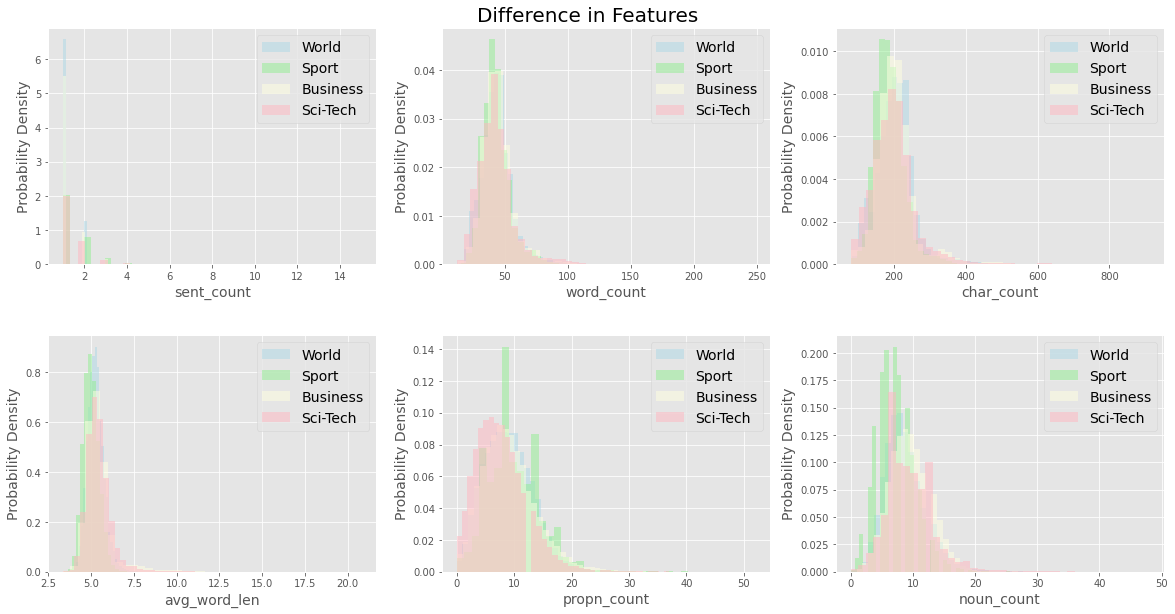

In [ ]:
# store the features and their names in variables
features = ['sent_count', 'word_count', 'char_count', 'avg_word_len', 'propn_count', 'noun_count']

# create the figure
fig = plt.figure(figsize=(20, 10))

# adjust the height of the padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.3)

# add a centered suptitle to the figure
plt.suptitle("Difference in Features", fontsize=20, y=0.91)

# generate the histograms in a for loop
for i, feature in enumerate(features):
    
    # add a new subplot iteratively
    ax = plt.subplot(2, 3, i+1)
    ax = df_train[df_train['Topic']==1][feature].hist(alpha=0.5, label='World', bins=40, color='lightblue', density=True)
    ax = df_train[df_train['Topic']==2][feature].hist(alpha=0.5, label='Sport', bins=40, color='lightgreen', density=True)
    ax = df_train[df_train['Topic']==3][feature].hist(alpha=0.5, label='Business', bins=40, color='lightyellow', density=True)
    ax = df_train[df_train['Topic']==4][feature].hist(alpha=0.5, label='Sci-Tech', bins=40, color='lightpink', density=True)
    
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
    

# shot the figure
plt.show()

# Store an upgraded csv file 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train.to_csv(r'/content/drive/MyDrive/Text_Mining/Train_upgraded.csv', index=False)

In [ ]:
df_test.to_csv(r'/content/drive/MyDrive/Text_Mining/Test_upgraded.csv', index=False)

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/Text_Mining/Train_upgraded.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Text_Mining/Test_upgraded.csv')

In [ ]:
df_train.head()

,Topic,Title,Description,Title + Description,Text Cleaned,sent_count,word_count,char_count,avg_word_len,propn_count,noun_count
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...,wall st bears claw black shortsellers wall str...,1,27,124,5.90,10,2
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle look commercial aerospace private inve...,1,42,231,6.42,8,9
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stocks outlook soar crude pr...,1,40,197,5.47,6,10
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halts oil exports main southern pipeline ...,1,40,221,6.14,12,7
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new...",oil price soar alltime record pose new menace ...,1,43,198,5.35,5,14


# Topic Modelling
---

In order to apply Topic Modelling methods we suppose we don't have the labels, although we do. 

## LDA
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

In [ ]:
# preprocessing
from sklearn.feature_extraction.text import CountVectorizer
#LDA
from sklearn.decomposition import LatentDirichletAllocation

###Performs it on Description

Since LDA relies on CountVectorizer() function, we need to understand how to set the two main parameters of the fuction, max_df and min_df.


In [ ]:
# try different ranges 
cv = CountVectorizer(max_df=0.25, min_df=0.001, stop_words='english')
cv1 = CountVectorizer(max_df=0.80, min_df=0.001, stop_words='english')
cv2 = CountVectorizer(max_df=0.25, min_df=0.05, stop_words='english')

In [ ]:
dtm = cv.fit_transform(df_train['Description'])
dtm1 = cv1.fit_transform(df_train['Description'])
dtm2 = cv2.fit_transform(df_train['Description'])

LDA = LatentDirichletAllocation(n_components=4,random_state=42)

print(f"{len(cv.get_feature_names_out())},{len(cv1.get_feature_names_out())},{len(cv2.get_feature_names_out())}")

3325,3325,14


as we can see from the number of features, we can see that the distribution is highly right skewned . Hence, for computational purposes in further analysis we will use the first range.

In [ ]:
cv = CountVectorizer(max_df=0.25, min_df=0.001, stop_words='english')

In [ ]:
dtm = cv.fit_transform(df_train['Description'])
dtm

<120000x3325 sparse matrix of type '<class 'numpy.int64'>'
	with 1688732 stored elements in Compressed Sparse Row format>

In [ ]:
LDA = LatentDirichletAllocation(n_components=4,random_state=42)

In [ ]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=4, random_state=42)

In [ ]:
# Print the number of stored words
len(cv.get_feature_names_out())

3325

In [ ]:
# Print the number of topic 
len(LDA.components_)

4

Let's visualize the top 15 words for each topic

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['million', 'company', 'year', 'stocks', 'fullquote', 'prices', 'york', 'percent', '39', 'oil', 'lt', 'gt', 'new', 'said', 'reuters']


THE TOP 15 WORDS FOR TOPIC #1
['quot', 'time', 'league', 'victory', 'sunday', 'win', 'year', 'world', 'team', 'night', 'season', 'ap', 'new', 'game', '39']


THE TOP 15 WORDS FOR TOPIC #2
['announced', 'technology', 'said', 'service', 'computer', 'quot', 'corp', 'lt', 'gt', 'internet', 'microsoft', 'software', 'company', 'new', '39']


THE TOP 15 WORDS FOR TOPIC #3
['monday', 'wednesday', 'yesterday', 'united', 'officials', 'minister', 'government', 'ap', 'people', 'quot', 'iraq', 'reuters', 'president', '39', 'said']




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Now, by looking at the most important words we can establish that: 
- topic #0 corresponds to Business 
- topic #1 corresponds to Sport
- topic #2 corresponds to Sci/Tech
- topic #3 corresponds to World

In [ ]:
# visualize the shape
dtm.shape

(120000, 3325)

In [ ]:
# let's now visualize the probabilities for each sentence
topic_result = LDA.transform(dtm)

In [ ]:
topic_result.shape

(120000, 4)

In [ ]:
# visualize the array
topic_result

array([[0.56586785, 0.35296882, 0.04392413, 0.0372392 ],
       [0.45614061, 0.27954968, 0.24485656, 0.01945315],
       [0.94788813, 0.0169875 , 0.01834961, 0.01677476],
       ...,
       [0.01541347, 0.61917977, 0.09080986, 0.27459691],
       [0.03873974, 0.9180157 , 0.036763  , 0.00648155],
       [0.0169869 , 0.94931782, 0.01682257, 0.01687271]])

In [ ]:
# add the column Arg Max with the estimated topics to the dataframe
df_train['Arg Max'] = topic_result.argmax(axis=1)

The next step is to determine how much the LDA clusters based on Description are closer to the real topics we have. 

In [ ]:
counterWorld = 0
counterBusiness = 0
counterSport = 0
counterTech = 0
total_correct = 0
mismatching = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max"][i]== 3:
    counterWorld +=1
    total_correct +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max"][i]== 1:
    counterSport +=1
    total_correct +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max"][i]== 0:
    counterBusiness +=1
    total_correct +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max"][i]== 2:
    counterTech +=1
    total_correct +=1
  else: 
    mismatching.append(i)
    
print(f"The number of total correct guesses is:{total_correct}, World: {counterWorld}, Business: {counterBusiness}, Sport: {counterSport}, Tech: {counterTech}")
print(mismatching[0:10])

The number of total correct guesses is:94843, World: 26662, Business: 19642, Sport: 28642, Tech: 19897
[3, 15, 16, 20, 26, 28, 29, 30, 31, 34]


In [ ]:
#let's print some uncorrect guesses
import random
for i in range(3):
  n = random.randint(0,len(mismatching))
  print("index: ",mismatching[n])
  print(df_train["Description"][mismatching[n]])
  print("estimated: ", df_train["Arg Max"][mismatching[n]])
  print("real topic: ",df_train["Topic"][mismatching[n]])
  print("---")

index:  112403
AP - The ritual was replayed from Boston to San Francisco: Exuberant gay couples sharing marriage vows and slices of wedding cake. Gays thought barriers were finally crumbling. Then came the elections.
estimated:  1
real topic:  1
---
index:  8161
AP - Researchers on Monday unveiled genetically engineered mice that can run farther and longer than their naturally bred brethren, bringing the "genetic doping" of elite athletes a small step closer to reality.
estimated:  1
real topic:  4
---
index:  114569
AP - On the surface, Lake Michigan is one of the world's biggest and wildest bodies of freshwater and a popular fishing destination.
estimated:  1
real topic:  4
---


###Performs it on Title + Description

Since LDA relies on CountVectorizer() function, we need to understand how to set the two main parameters of the fuction, max_df and min_df.


In [ ]:
cv = CountVectorizer(max_df=0.25, min_df=0.001, stop_words='english')
cv1 = CountVectorizer(max_df=0.80, min_df=0.001, stop_words='english')
cv2 = CountVectorizer(max_df=0.25, min_df=0.05, stop_words='english')

In [ ]:
dtm = cv.fit_transform(df_train['Title + Description'])
dtm1 = cv1.fit_transform(df_train['Title + Description'])
dtm2 = cv2.fit_transform(df_train['Title + Description'])

LDA = LatentDirichletAllocation(n_components=4,random_state=42)

print(f"{len(cv.get_feature_names_out())},{len(cv1.get_feature_names_out())},{len(cv2.get_feature_names_out())}")

3785,3785,14


As already stated above, also in this case the distribution is highly right skewned . Hence, for computational purposes in further analysis we will use the first range.

In [ ]:
cv = CountVectorizer(max_df=0.8, min_df=0.001, stop_words='english')
dtm_TD = cv.fit_transform(df_train['Title + Description'])
dtm_TD

<120000x3785 sparse matrix of type '<class 'numpy.int64'>'
	with 1971715 stored elements in Compressed Sparse Row format>

In [ ]:
LDA_TD = LatentDirichletAllocation(n_components=4,random_state=42)

In [ ]:
LDA_TD.fit(dtm_TD)

LatentDirichletAllocation(n_components=4, random_state=42)

In [ ]:
# visualize number of stored words
len(cv.get_feature_names_out())

3785

In [ ]:
# print the 15 most frequent words of each Topic
for idx, topic in enumerate(LDA_TD.components_):
    print(f"Top 15 words in Topic #{idx}:")
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]]) 
    print('')

Top 15 words in Topic #0:
['officials', 'new', 'killed', 'quot', 'government', 'bush', 'people', 'minister', 'afp', 'president', 'iraq', 'reuters', 'ap', 'said', '39']

Top 15 words in Topic #1:
['web', 'ibm', 'technology', 'online', 'computer', 'search', 'said', 'service', 'quot', 'internet', 'company', 'software', 'microsoft', 'new', '39']

Top 15 words in Topic #2:
['quarter', 'company', 'fullquote', 'sales', 'york', 'percent', 'prices', 'stocks', 'new', '39', 'said', 'oil', 'reuters', 'lt', 'gt']

Top 15 words in Topic #3:
['time', 'cup', 'sunday', 'league', 'victory', 'year', 'world', 'night', 'team', 'season', 'win', 'new', 'game', 'ap', '39']



Now, by looking at the most important words we can establish that: 
- topic #0 corresponds to World
- topic #1 corresponds to Sci/Tech
- topic #2 corresponds to Business
- topic #3 corresponds to Sport

In [ ]:
dtm_TD

<120000x3785 sparse matrix of type '<class 'numpy.int64'>'
	with 1971715 stored elements in Compressed Sparse Row format>

In [ ]:
# visualize the shape 
dtm_TD.shape

(120000, 3785)

In [ ]:
# let's now visualize the probabilities for each sentence
topic_results_TD = LDA_TD.transform(dtm_TD)

In [ ]:
topic_results_TD.shape

(120000, 4)

In [ ]:
topic_results_TD

array([[0.01998063, 0.02059596, 0.50809645, 0.45132696],
       [0.01572964, 0.47555971, 0.35756777, 0.15114287],
       [0.01258659, 0.01314071, 0.96159319, 0.01267951],
       ...,
       [0.28232861, 0.08314703, 0.01414848, 0.62037587],
       [0.00605622, 0.03192644, 0.02418273, 0.93783461],
       [0.01262227, 0.01266004, 0.01265597, 0.96206171]])

In [ ]:
# adds a column to the dataframe
df_train['Arg Max T+D'] = topic_results_TD.argmax(axis=1)

The next step is to determine how much the LDA clusters based on Title+Description are closer to the real topics we have. 

In [ ]:
counterWorld_TD = 0
counterBusiness_TD = 0
counterSport_TD = 0
counterTech_TD = 0
total_correct_TD = 0
mismatching_TD = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max T+D"][i]== 0:
    counterWorld_TD +=1
    total_correct_TD +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max T+D"][i]== 3:
    counterSport_TD +=1
    total_correct_TD +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max T+D"][i]== 2:
    counterBusiness_TD +=1
    total_correct_TD +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max T+D"][i]== 1:
    counterTech_TD +=1
    total_correct_TD +=1
  else: 
    mismatching_TD.append(i)
    
print(f"The number of total correct guesses is:{total_correct_TD}, World: {counterWorld_TD}, Business: {counterBusiness_TD}, Sport: {counterSport_TD}, Tech: {counterTech_TD}")
print(mismatching_TD[0:10])

The number of total correct guesses is:97197, World: 26760, Business: 19451, Sport: 28788, Tech: 22198
[1, 3, 8, 13, 15, 16, 20, 26, 29, 30]


In [ ]:
# #let's print some uncorrect guesses
import random
for i in range(3):
  n = random.randint(0,len(mismatching_TD))
  print("index: ",mismatching_TD[n])
  print(df_train["Description"][mismatching_TD[n]])
  print("estimated: ", df_train["Arg Max T+D"][mismatching_TD[n]])
  print("real topic: ",df_train["Topic"][mismatching_TD[n]])
  print("---")

index:  86905
Vodafone have launched the long-awaited third generation, 3G, mobile phone service that offers video calls and music downloads. The use of 3G technology promises faster data rates for mobile users that will 
estimated:  1
real topic:  3
---
index:  51246
The Public Broadcasting Service said yesterday that it signed a deal to move its headquarters from Alexandria to Crystal City, where Charles E. Smith Commercial Realty has renovated offices and retail space to make the area more pedestrian-friendly and attract non-government tenants.
estimated:  1
real topic:  3
---
index:  82357
&lt;p&gt;\&lt;/p&gt;&lt;p&gt; NEW YORK (Reuters) - Verizon Wireless said on Thursday that\it had signed an agreement with NextWave Telecom Inc. to\purchase all of its airwave licenses for \$3 billion.&lt;/p&gt;
estimated:  2
real topic:  4
---


###Perform it on Cleaned Text

In [ ]:
cv = CountVectorizer(max_df=0.25, min_df=0.001, stop_words='english')
cv1 = CountVectorizer(max_df=0.80, min_df=0.001, stop_words='english')
cv2 = CountVectorizer(max_df=0.25, min_df=0.05, stop_words='english')

In [ ]:
dtm = cv.fit_transform(df_train['Text Cleaned'])
dtm1 = cv1.fit_transform(df_train['Text Cleaned'])
dtm2 = cv2.fit_transform(df_train['Text Cleaned'])

LDA = LatentDirichletAllocation(n_components=4,random_state=42)

print(f"{len(cv.get_feature_names_out())},{len(cv1.get_feature_names_out())},{len(cv2.get_feature_names_out())}")

3093,3093,13


As we can see from the number of features, we can see that the distribution is highly right skewned . Hence, for computational purposes in further analysis we will use the first range.

In [ ]:
cv = CountVectorizer(max_df=0.25, min_df=0.001, stop_words='english')

In [ ]:
dtm_C = cv.fit_transform(df_train['Text Cleaned'])
dtm_C


<120000x3093 sparse matrix of type '<class 'numpy.int64'>'
	with 1782871 stored elements in Compressed Sparse Row format>

In [ ]:
LDA_C = LatentDirichletAllocation(n_components=4,random_state=42)

In [ ]:
LDA_C.fit(dtm_C)

LatentDirichletAllocation(n_components=4, random_state=42)

Showing stored words

In [ ]:
# visualize the number of stored words
len(cv.get_feature_names_out())

3093

In [ ]:
len(LDA_C.components_)

4

In [ ]:
# prints the 15 most frequent words of each Topic
for index,topic in enumerate(LDA_C.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['official', 'country', 'union', 'year', 'minister', 'plan', 'court', 'united', 'government', 'election', 'bush', 'oil', 'new', 'president', 'quot']


THE TOP 15 WORDS FOR TOPIC #1
['gaza', 'north', 'military', 'palestinian', 'bomb', 'force', 'city', 'baghdad', 'iraqi', 'police', 'official', 'attack', 'people', 'iraq', 'kill']


THE TOP 15 WORDS FOR TOPIC #2
['sunday', 'coach', 'cup', 'league', 'play', 'year', 'victory', 'lead', 'world', 'night', 'season', 'new', 'team', 'game', 'win']


THE TOP 15 WORDS FOR TOPIC #3
['profit', 'business', 'report', 'market', 'percent', 'software', 'service', 'million', 'year', 'stock', 'price', 'corp', 'microsoft', 'company', 'new']




Now, by looking at the most important words we can establish that: 
- topic #0 corresponds to Sci/Tech
- topic #1 corresponds to Business
- topic #2 corresponds to World
- topic #3 corresponds to Sport

In [ ]:
# visualize the shape
dtm_C.shape

(120000, 3093)

In [ ]:
# let's now visualize the probabilities for each sentence
topic_result_C = LDA_C.transform(dtm_C)

In [ ]:
topic_result_C.shape

(120000, 4)

In [ ]:
topic_result_C

array([[0.03244014, 0.03337487, 0.51391945, 0.42026554],
       [0.01675605, 0.01667871, 0.35449827, 0.61206697],
       [0.01330875, 0.01280594, 0.01298344, 0.96090187],
       ...,
       [0.37677126, 0.01463737, 0.59406178, 0.01452959],
       [0.00775822, 0.00806638, 0.90850567, 0.07566972],
       [0.01536174, 0.0148133 , 0.9543534 , 0.01547156]])

In [ ]:
# adds a column to the dataframe
df_train['Arg Max_C'] = topic_result_C.argmax(axis=1)

The next step is to determine how much the LDA clusters based on Text Cleaned are closer to the real topics we have.

In [ ]:
counterWorld_C = 0
counterBusiness_C = 0
counterSport_C = 0
counterTech_C = 0
total_correct_C = 0
mismatching_C = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max_C"][i]== 2:
    counterWorld_C +=1
    total_correct_C +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max_C"][i]== 3:
    counterSport_C +=1
    total_correct_C +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max_C"][i]== 1:
    counterBusiness_C +=1
    total_correct_C +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max_C"][i]== 0:
    counterTech_C +=1
    total_correct_C +=1
  else: 
    mismatching_C.append(i)
    
print(f"The number of total correct guesses is:{total_correct_C}, World: {counterWorld_C}, Business: {counterBusiness_C}, Sport: {counterSport_C}, Tech: {counterTech_C}")
print(mismatching_C[0:10])

The number of total correct guesses is:8855, World: 1605, Business: 432, Sport: 215, Tech: 6603
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# #let's print some uncorrect guesses
import random
for i in range(3):
  n = random.randint(0,len(mismatching_C))
  print("index: ",mismatching_C[n])
  print(df_train["Description"][mismatching_C[n]])
  print("estimated: ", df_train["Arg Max"][mismatching_C[n]])
  print("real topic: ",df_train["Topic"][mismatching_C[n]])
  print("---")

index:  56366
Real Madrid believe David Beckham will be able to take part in a gym session on Wednesday despite the England captain suffering a hairline rib fracture in Saturdays 2-0 defeat of Wales.
estimated:  1
real topic:  2
---
index:  38814
Reuters - Iraq's new prime minister, in\his debut appearance before the U.N. General Assembly, appealed\to world governments on Friday to put aside their differences\over the war and help Baghdad rebuild.
estimated:  3
real topic:  1
---
index:  101437
AP - President Bush's re-election insures that more federal money will flow to abstinence education that precludes discussion of birth control, even as the administration awaits evidence that the approach gets kids to refrain from sex.
estimated:  3
real topic:  1
---


### Pie plot summary

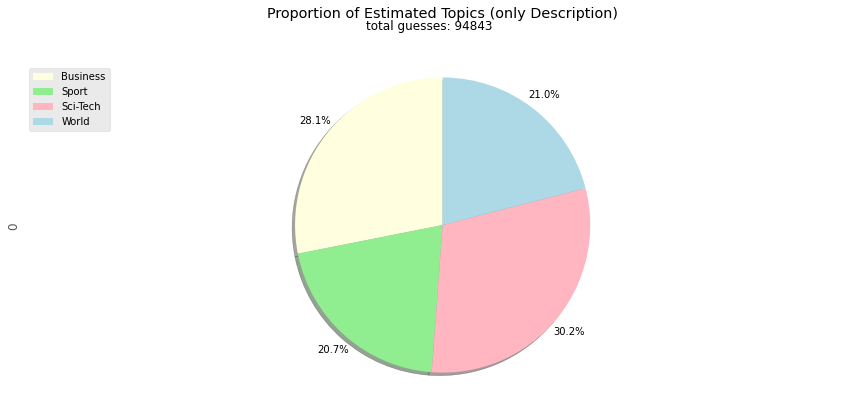

In [ ]:
A = [counterWorld,counterBusiness,counterSport,counterTech]
ArgMax = pd.DataFrame(A)

colors_list = ['lightyellow', 'lightgreen', 'lightpink', 'lightblue']

ArgMax[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                           

plt.title('Proportion of Estimated Topics (only Description)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct}")
plt.axis('equal') 

# add legend
plt.legend(labels=['Business', 'Sport', 'Sci-Tech', 'World'], loc='upper left') 


plt.show()

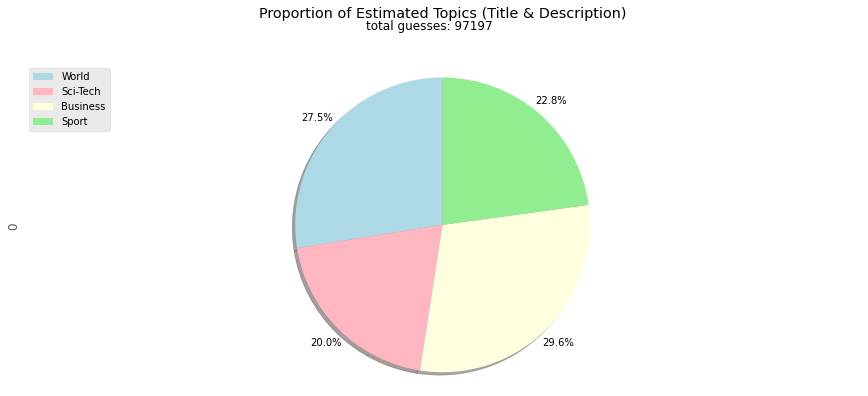

In [ ]:
A_TD = [counterWorld_TD,counterBusiness_TD,counterSport_TD,counterTech_TD]
ArgMax_TD = pd.DataFrame(A_TD)

colors_list = ['lightblue', 'lightpink', 'lightyellow', 'lightgreen']

ArgMax_TD[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                        

# scale the title up by 12% to match pctdistance
plt.title('Proportion of Estimated Topics (Title & Description)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct_TD}")
plt.axis('equal') 

# add legend
plt.legend(labels=['World', 'Sci-Tech', 'Business', 'Sport'], loc='upper left') 


plt.show()

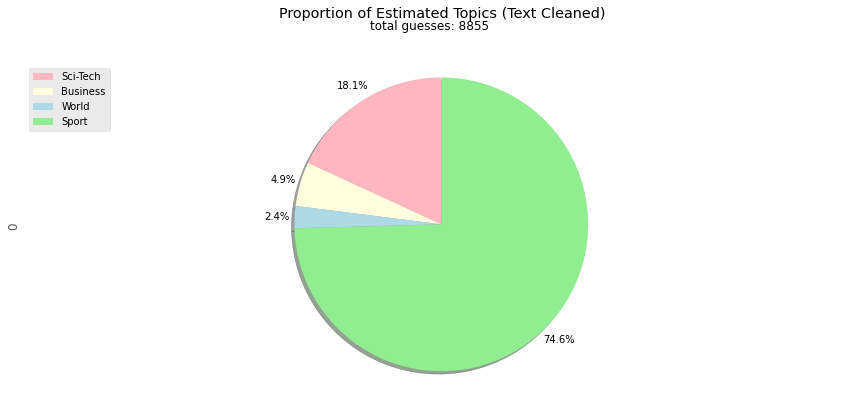

In [ ]:
A_C = [counterWorld_C,counterBusiness_C,counterSport_C,counterTech_C]
ArgMax_C = pd.DataFrame(A_C)

colors_list = ['lightpink', 'lightyellow', 'lightblue', 'lightgreen']

#explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

ArgMax_C[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            #)

# scale the title up by 12% to match pctdistance
plt.title('Proportion of Estimated Topics (Text Cleaned)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct_C}")
plt.axis('equal') 

# add legend
plt.legend(labels=['Sci-Tech', 'Business', 'World', 'Sport'], loc='upper left') 


plt.show()

After the LDA implementation, we can state that the best performance is achieved by using Title+Description. This may due to the fact that this analysis has more data.

## Interactive Plot

In the following interacting plot are reported the most frequent words in each topic, based on Title + Description.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_train['Title + Description'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['wall', 'st', 'bears', 'claw', 'back', 'black', 'reuters', 'reuters', 'short', 'sellers', 'wall', 'street', 'dwindling', 'band', 'ultra', 'cynics', 'seeing', 'green']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"gt" + 0.017*"lt" + 0.016*"reuters" + 0.011*"said" + 0.009*"oil" + '
  '0.008*"new" + 0.008*"us" + 0.008*"inc" + 0.007*"company" + 0.006*"billion"'),
 (1,
  '0.009*"ap" + 0.008*"new" + 0.006*"game" + 0.006*"season" + 0.005*"first" + '
  '0.005*"year" + 0.005*"one" + 0.004*"night" + 0.004*"team" + 0.004*"two"'),
 (2,
  '0.010*"said" + 0.009*"ap" + 0.008*"reuters" + 0.007*"iraq" + '
  '0.006*"president" + 0.006*"us" + 0.006*"two" + 0.005*"bush" + '
  '0.005*"minister" + 0.005*"killed"'),
 (3,
  '0.008*"new" + 0.007*"said" + 0.005*"search" + 0.005*"internet" + '
  '0.005*"quot" + 0.005*"microsoft" + 0.005*"security" + 0.004*"talks" + '
  '0.004*"software" + 0.004*"china"')]


In [ ]:
!pip install pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='tsne')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 19.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=7e76fa6c08aaed199b2e52b56e7a4c97f3567289504e0ab52814ba67172202d2
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=872a922e97c70c82f9c8e0c24e0d82094a513e20187ae41c8a1f0e86ef5b866d
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 

In [ ]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  27.446996
3        1.782994 -295.079681       2        1  24.588827
0      220.811432 -343.832123       3        1  24.208858
2       50.533993  -76.050934       4        1  23.755319, topic_info=           Term          Freq         Total Category  logprob  loglift
2695         gt  14397.000000  14397.000000  Default  30.0000  30.0000
2697         lt  14364.000000  14364.000000  Default  29.0000  29.0000
49          oil   6573.000000   6573.000000  Default  28.0000  28.0000
8       reuters  20000.000000  20000.000000  Default  27.0000  27.0000
68         iraq   5335.000000   5335.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1226  wednesday   2354.610755   8125.770281   Topic4  -5.7355   0.1987
94        three   2137.049558   5445.261466   Topic4  -5.8325   0.5020
526   yesterday   2164.875481   6462.568909   Topic4  -5.8195   0.3437
130    thursday   2107.935391   8156.725085   Topic4  -5.8462   0.0842
635      former   1961.384286   3799.195150   Topic4  -5.9183   0.7762

[335 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
11950      2  0.001585       abbas
11950      4  0.998605       abbas
3877       1  0.003930      access
3877       2  0.989120      access
3877       3  0.006550      access
...      ...       ...         ...
185        2  0.011654        york
185        3  0.636259        york
185        4  0.003007        york
8294       3  0.999628       yukos
27889      4  0.999096  yushchenko

[711 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

### Interpreting the Word-Relevance Summary:

[link for more details](https://community.alteryx.com/t5/Data-Science/Getting-to-the-Point-with-Topic-Modeling-Part-3-Interpreting-the/ba-p/614992)

in the plot above there are two metrics: Relevance and Saliency.

- The intent of **salience** is to help identify which words are the most informative words for identifying topics in all the documents; Higher saliency values indicate that a word is more useful for identifying a specific topic.

- **Relevance** is a metric used for ranking terms within topics. It helps identify the most relevant words within a given topic. It reflects the level at which a word belongs to a certain topic at the exclusion of other topics. Setting the relevance equal to 1
results in the familiar ranking of terms in decreasing order of their topic-specific probability.



## Non-Negative Matrix Factorization NNMF



Non-Negative Matrix Factorization is an unsupervised algorithm that simultaneously performs dimensionality reduction and clustering.
We use it with TF-IDF to model the Topics.

### Performs it on Title + Description

In [ ]:
#NON-NEGATIVE MATRIX FACTORIZATION
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.25, min_df=0.001, stop_words='english')
dtm_nmf_TD = tfidf.fit_transform(df_train['Title + Description'])

In [ ]:
dtm_nmf_TD

<120000x3785 sparse matrix of type '<class 'numpy.float64'>'
	with 1971715 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model_TD = NMF(n_components=4, random_state=42)

In [ ]:
nmf_model_TD.fit(dtm_nmf_TD)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=4, random_state=42)

In [ ]:
# visualized the number of stored words
len(tfidf.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3785

In [ ]:
len(nmf_model_TD.components_)

4

Visualization of the 15 most frequent words for each Topic

In [ ]:
for index,topic in enumerate(nmf_model_TD.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['cup', 'time', 'says', 'today', 'company', 'team', 'year', 'yesterday', 'game', 'new', 'said', 'microsoft', 'world', 'quot', '39']


THE TOP 15 WORDS FOR TOPIC #1
['font', 'reuters', 'stocks', 'target', 'investor', 'com', 'quickinfo', 'aspx', 'ticker', 'www', 'href', 'http', 'fullquote', 'gt', 'lt']


THE TOP 15 WORDS FOR TOPIC #2
['company', 'crude', 'tuesday', 'higher', 'sales', 'quarter', 'profit', 'percent', 'york', 'said', 'stocks', 'new', 'prices', 'oil', 'reuters']


THE TOP 15 WORDS FOR TOPIC #3
['john', 'victory', 'state', 'season', '151', 'saturday', 'sunday', 'night', 'kerry', 'said', 'game', 'president', 'iraq', 'bush', 'ap']




Now, by looking at the most important words we can establish that: 
- topic #0 corresponds to Sci/Tech
- topic #1 corresponds to World
- topic #2 corresponds to Business
- topic #3 corresponds to Sport

In [ ]:
# transforms the probability distribution of topics in each sentence
topic_results_nmf_TD = nmf_model_TD.transform(dtm_nmf_TD)

In [ ]:
# finds the max probability and the corresponding Topic
topic_results_nmf_TD.argmax(axis=1)

array([2, 2, 2, ..., 3, 3, 0])

In [ ]:
# adds a column in the dataframe
df_train['Arg Max T+D_nmf'] = topic_results_nmf_TD.argmax(axis=1)

The next step is to determine how much the NMF clusters based on 
Title+Description are closer to the real topics we have.

In [ ]:
counterWorld_nmf_TD = 0
counterBusiness_nmf_TD = 0
counterSport_nmf_TD = 0
counterTech_nmf_TD = 0
total_correct_nmf_TD = 0
mismatching_nmf_TD = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max T+D_nmf"][i]== 1:
    counterWorld_nmf_TD +=1
    total_correct_nmf_TD +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max T+D_nmf"][i]== 3:
    counterSport_nmf_TD +=1
    total_correct_nmf_TD +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max T+D_nmf"][i]== 2:
    counterBusiness_nmf_TD +=1
    total_correct_nmf_TD +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max T+D_nmf"][i]== 0:
    counterTech_nmf_TD +=1
    total_correct_nmf_TD +=1
  else: 
    mismatching_nmf_TD .append(i)
    
print(f"The number of total correct guesses is:{total_correct_nmf_TD }, World: {counterWorld_nmf_TD }, Business: {counterBusiness_nmf_TD }, Sport: {counterSport_nmf_TD }, Tech: {counterTech_nmf_TD }")
print(mismatching_nmf_TD[0:10])

The number of total correct guesses is:41782, World: 982, Business: 20413, Sport: 10222, Tech: 10165
[6, 15, 16, 34, 39, 40, 41, 52, 56, 57, 59, 63, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 165, 167, 173, 175, 176, 177, 179, 180, 181, 185, 186, 187, 188, 189, 190, 191, 194, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 224, 226, 228, 229, 230, 231, 233, 234, 235, 238, 240, 242, 244, 245, 246, 247, 248, 250, 253, 255, 257, 259, 260, 261, 262, 263, 264, 265, 266, 269, 273, 274, 275, 276, 279, 281, 282, 284, 285, 287, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302

### Performs it on Text Cleaned

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_C_NMF = TfidfVectorizer(max_df=0.25, min_df=0.001, stop_words='english')

In [ ]:
dtm_C_NMF = tfidf_C_NMF.fit_transform(df_train['Text Cleaned'])

In [ ]:
dtm_C_NMF

<120000x3093 sparse matrix of type '<class 'numpy.float64'>'
	with 1782752 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model_C_NMF = NMF(n_components=4,random_state=42)

In [ ]:
nmf_model_C_NMF.fit(dtm_C_NMF)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=4, random_state=42)

In [ ]:
# visualize the number of stored words
len(tfidf_C_NMF.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3093

In [ ]:
len(nmf_model_C_NMF.components_)

4

Visualization of the 15 most frequent words for each Topic

In [ ]:
for index,topic in enumerate(nmf_model_C_NMF.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_C_NMF.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')
  

THE TOP 15 WORDS FOR TOPIC #0
['billion', 'buy', 'search', 'profit', 'computer', 'plan', 'internet', 'business', 'million', 'service', 'corp', 'software', 'microsoft', 'company', 'new']


THE TOP 15 WORDS FOR TOPIC #1
['percent', 'supply', 'dollar', 'low', 'york', 'profit', 'record', 'barrel', 'fall', 'crude', 'rise', 'high', 'stock', 'price', 'oil']


THE TOP 15 WORDS FOR TOPIC #2
['prime', 'police', 'election', 'bush', 'bomb', 'official', 'attack', 'people', 'iraqi', 'minister', 'president', 'baghdad', 'iraq', 'kill', 'quot']


THE TOP 15 WORDS FOR TOPIC #3
['second', 'red', 'year', 'sox', 'new', 'league', 'cup', 'world', 'victory', 'night', 'season', 'lead', 'team', 'game', 'win']




Now, by looking at the most important words we can establish that: 
- topic #0 corresponds to Sci/Tech
- topic #1 corresponds to Business
- topic #2 corresponds to World
- topic #3 corresponds to Sport

In [ ]:
# prints the probability of the topics in each sentence
topic_results_C_NMF = nmf_model_C_NMF.transform(dtm_C_NMF)

In [ ]:
# computes the max probability and the corresponding topic
topic_results_C_NMF.argmax(axis=1)

array([3, 0, 1, ..., 3, 3, 3])

In [ ]:
# adds a column to the dataframe
df_train['Arg Max_C_NMF'] = topic_results_C_NMF.argmax(axis=1)

The next step is to determine how much the NMF clusters based on Text Cleaned are closer to the real topics we have

In [ ]:

counterWorld_C_NMF = 0
counterBusiness_C_NMF = 0
counterSport_C_NMF = 0
counterTech_C_NMF = 0
total_correct_C_NMF = 0
mismatching_C_NMF = []
for i in range(0,120000):
  if df_train["Topic"][i] == 1 and  df_train["Arg Max_C_NMF"][i]== 2:
    counterWorld_C_NMF +=1
    total_correct_C_NMF +=1
  elif df_train["Topic"][i] == 2 and df_train["Arg Max_C_NMF"][i]== 3:
    counterSport_C_NMF +=1
    total_correct_C_NMF +=1
  elif df_train["Topic"][i] == 3 and  df_train["Arg Max_C_NMF"][i]== 1:
    counterBusiness_C_NMF +=1
    total_correct_C_NMF +=1
  elif df_train["Topic"][i] == 4 and  df_train["Arg Max_C_NMF"][i]== 0:
    counterTech_C_NMF +=1
    total_correct_C_NMF +=1
  else: 
    mismatching_C_NMF.append(i)
    
print(f"The number of total correct guesses is:{total_correct_C_NMF}, World: {counterWorld_C_NMF}, Business: {counterBusiness_C_NMF}, Sport: {counterSport_C_NMF}, Tech: {counterTech_C_NMF}")
print(mismatching_C_NMF[0:10])


The number of total correct guesses is:82557, World: 24636, Business: 9377, Sport: 28072, Tech: 20472
[0, 1, 6, 8, 9, 13, 15, 16, 20, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 119, 120, 122, 123, 125, 126, 127, 128, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 145, 148, 150, 151, 153, 154, 155, 156, 158, 161, 162, 164, 165, 166, 169, 170, 172, 173, 175, 176, 177, 179, 180, 181, 182, 183, 189, 192, 194, 196, 197, 199, 200, 202, 203, 213, 214, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 239, 240, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 2

### Pie plot summary

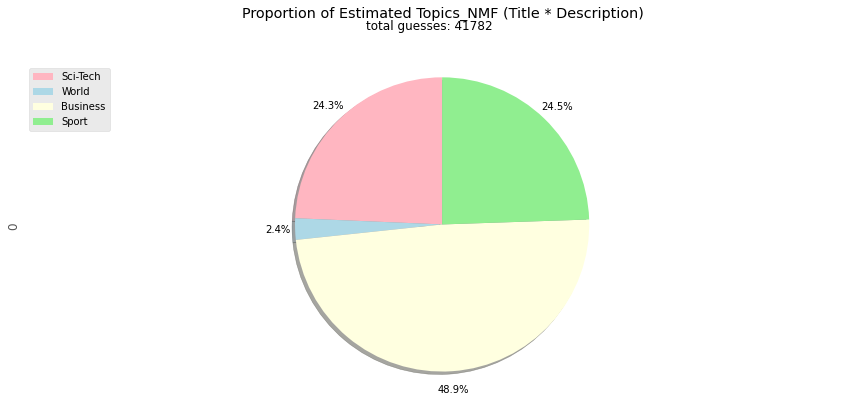

In [ ]:
A_nmf_TD = [counterTech_nmf_TD,counterWorld_nmf_TD,counterBusiness_nmf_TD,counterSport_nmf_TD]
ArgMax_nmf_TD = pd.DataFrame(A_nmf_TD)

colors_list = ['lightpink', 'lightblue', 'lightyellow', 'lightgreen']

ArgMax_nmf_TD[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            #)

# scale the title up by 12% to match pctdistance
plt.title('Proportion of Estimated Topics_NMF (Title + Description)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct_nmf_TD}")
plt.axis('equal') 

# add legend
plt.legend(labels=['Sci-Tech', 'World', 'Business', 'Sport'], loc='upper left') 


plt.show()

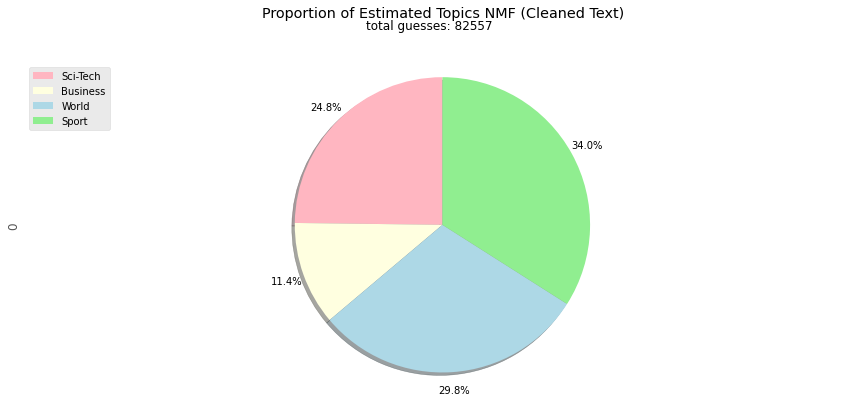

In [ ]:
A_C_NMF = [counterTech_C_NMF,counterBusiness_C_NMF,counterWorld_C_NMF,counterSport_C_NMF]
ArgMax_C_NMF = pd.DataFrame(A_C_NMF)

colors_list = ['lightpink', 'lightyellow', 'lightblue', 'lightgreen']

ArgMax_C_NMF[0].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list)  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            #)

# scale the title up by 12% to match pctdistance
plt.title('Proportion of Estimated Topics NMF (Cleaned Text)', y=1.12) 
plt.suptitle(f"total guesses: {total_correct_C_NMF}")
plt.axis('equal') 

# add legend
plt.legend(labels=['Sci-Tech', 'Business', 'World', 'Sport'], loc='upper left') 


plt.show()

After the implementation of both methods we can conclude that, based on the assumption that we do not have labels, NMF would be a bad idea. So instead, we would have continued with the results of the LDA method.

#Neural Network approach 

In this part of the analysis we are going to implement different Recurrent Neural Networks for data classification.

The main problem of RNN is that they suffer from short-term memory. This means that if a sequence is long enough, they'll have a hard time carrying informations from earlier steps to later ones. Hence, the use of LSTM or GRU, created as solutions to the short-term memory. Indeed, they have gates that can regulate the flow of information, by learning which data in a sequence is important to keep or throw away.  

<div align= "center"><img src="https://media.giphy.com/media/SOPagmuxYZChi/giphy.gif"></div>

##  BiLTSM With Glove

BiLSTM, unlike standard LSTM, the input flows in both directions and it's capable to of utilizing information from both sides. It's a powerful tool for modeling the sequential dependencies beween words in both directions of the sequence.  

The first thing we do is import the necessary modules.
These are: 
- Tensorflow, in particular Keras, which is going to be foundamental to implement our RNNs
- seqeval, very useful to redact classification reports with which we can evaluate the performance of the network
- numpy, used to perform data manipulation on linear algebra objects such as matrices and tensors. 
From the folder new_utils we also call a custom-made function created to perform dataset splitting for cross-validation

In [ ]:
!pip install seqeval

import re                                   # 're' Replication of text.
import numpy as np                          
import pandas as pd                         # 'pandas' to manipulate the dataset.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns                       # 'seaborn' to visualize the dataset.
import tensorflow as tf
from tensorflow.keras.models import Sequential                # 'Sequential' model will be used for training.
from sklearn.model_selection import train_test_split          # 'train_test_split' for splitting the data into train and test data. 
from tensorflow.keras.preprocessing.text import Tokenizer       
from tensorflow.keras.preprocessing.sequence import pad_sequences       # 'pad_sequences' for having same dimmension for each sequence.
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, GRU     # import some layers for training.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.3 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=2283d7a745b3618966b5d34b4cd04d2c5de43a7e3ac3d4f3930391ff12755948
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


### Preparing the Dataframe

In [ ]:
X_train, X_test = df_train['Text Cleaned'], df_test['Text Cleaned']

In [ ]:
#Preparing labels and converting them from (1, 2, 3, 4) labels to a (0, 1) matrix form for training purpose.
Y_train = pd.get_dummies(df_train['Topic']).values
Y_test = pd.get_dummies(df_test['Topic']).values

###Preparing the text for feeding into algorithm.

In this step we define the vocabulary and covert text/sentences into sequences.

In [ ]:
tokenizer = Tokenizer(num_words = 5000) #creates a tokenizer object with vocab.size=5000

tokenizer.fit_on_texts(X_train) # tokenization of our features

X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
def longest(list1):
    longest_list = max(len(elem) for elem in list1)
    return longest_list

longest(X_train)

75

Padding all sequences to have same dimensions.

In [ ]:
vocab_size = len(tokenizer.word_index) + 1 # unique words in the text

max_len = 75

X_train = pad_sequences(X_train, padding = 'post', maxlen = max_len)
X_test = pad_sequences(X_test, padding = 'post', maxlen = max_len)

###Preparing GloVe Embeddings to use them in training the model.

In [ ]:
embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Text_Mining/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
word_index = tokenizer.word_index # glove's dictionary
len(word_index)

71629

###Define Layers and Compile

Define Embedding layer using GloVe weights and an BiLSTM layers with 100 neurons and at the last Dense layer with final neuron with 'softmax' activation.
Finally compile the model having 'categorical_crossentropy' as a loss function, 'adam' as an optimizer with 'categorical_accuracy' as a metric.

In [ ]:
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    100,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 75, 100)           7163000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 75, 100)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1024)              205824    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1

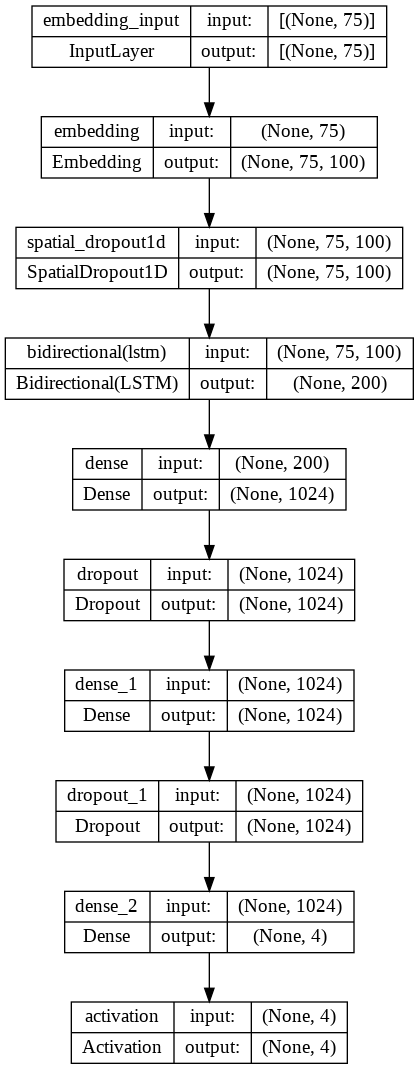

In [ ]:
# graphical representation of the model
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

####Fit the model with '5' epochs having batch size of '128' reviews and '20%' of validation data.

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 5, verbose = 1,validation_split = 0.2)

Epoch 1/5
750/750 [==============================] - 162s 209ms/step - loss: 0.4781 - categorical_accuracy: 0.8352 - val_loss: 0.3273 - val_categorical_accuracy: 0.8838
Epoch 2/5
750/750 [==============================] - 156s 208ms/step - loss: 0.3968 - categorical_accuracy: 0.8688 - val_loss: 0.3099 - val_categorical_accuracy: 0.8882
Epoch 3/5
750/750 [==============================] - 155s 207ms/step - loss: 0.3702 - categorical_accuracy: 0.8763 - val_loss: 0.3053 - val_categorical_accuracy: 0.8887
Epoch 4/5
750/750 [==============================] - 156s 208ms/step - loss: 0.3567 - categorical_accuracy: 0.8811 - val_loss: 0.2916 - val_categorical_accuracy: 0.8951
Epoch 5/5
750/750 [==============================] - 156s 209ms/step - loss: 0.3470 - categorical_accuracy: 0.8836 - val_loss: 0.2909 - val_categorical_accuracy: 0.8924


After 5 epochs we obtain:
- Significant low loss and validation loss
- Pretty high categorical accuracy and validation accuracy

In order to evaluate our model, we use test data.

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)

238/238 [==============================] - 9s 39ms/step - loss: 0.2942 - categorical_accuracy: 0.8989


Also here, theree is low loss and good categorical accuracy.

In [ ]:
model.save("Model1.0")

####Model Performance Visualization using Matplotlib

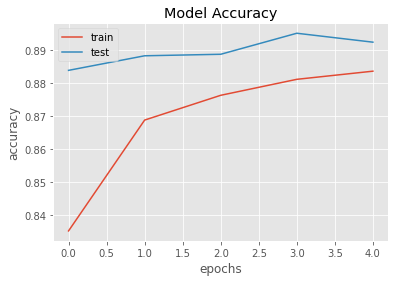

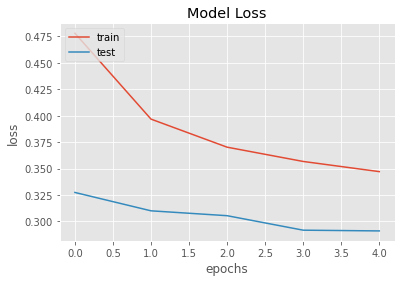

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

We can notice from the graphs above an improvement of the accuracy in each epoch, in particular the model applied to the test set performs better.

####Prediction Stage

in this section we try to predict the topic of some real descriptions from NY Times.

In [ ]:
index = 150
#print( f"Topic: {df_test['Topic'][index]}   |" , df_test['Title + Description'][index])
instance = "When mission controllers observed white particles spewing from a spacecraft that serves as a “lifeboat” for the International Space Station, they scrapped the mission."
print(instance)

instance = tokenizer.texts_to_sequences(instance)

flat_list = []

for sublist in instance :
    for item in sublist :
        flat_list.append(item)
        
flat_list = [flat_list]

flat_list = pad_sequences(flat_list, padding = 'post', maxlen = max_len)

topic_index = np.argmax(model.predict(flat_list))
print(f"Array with the probabilities fro each topic: {model.predict(flat_list)}")
def topic(topic):
  if topic == 0:
    return print('The topic is World')
  elif topic == 1:
    return print('The topic is Sport')
  elif topic == 2:
    return print('The topic is Business')
  else: 
    return print('The topic is Sci-Tech')

topic(topic_index)

When mission controllers observed white particles spewing from a spacecraft that serves as a “lifeboat” for the International Space Station, they scrapped the mission.
1/1 [==============================] - 0s 48ms/step
Array with the probabilities fro each topic: [[3.4027573e-04 1.1113945e-05 3.8430116e-03 9.9580562e-01]]
The topic is Sci-Tech


###Metrics

In [ ]:
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from drive.MyDrive.Text_Mining.utils import dataio, kerasutils, modelutils #Import from Drive

In [ ]:
import urllib
import sklearn
import logging
import os
import numpy as np
from seqeval.metrics import classification_report
#from utils import dataio, kerasutils, modelutils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
predictions = model.predict(X_test)
predictions

238/238 [==============================] - 9s 38ms/step


array([[9.9964542e-03, 4.5813780e-04, 9.5902050e-01, 3.0524859e-02],
       [3.4988936e-02, 3.8795877e-02, 3.5641406e-02, 8.9057386e-01],
       [1.5684940e-02, 2.4083431e-03, 6.2796104e-01, 3.5394564e-01],
       ...,
       [4.6389024e-03, 9.9512166e-01, 2.1493375e-04, 2.4515475e-05],
       [2.7174981e-02, 1.2756973e-04, 9.6867967e-01, 4.0177372e-03],
       [1.2077529e-02, 1.0062084e-03, 4.8192722e-01, 5.0498903e-01]],
      dtype=float32)

In [ ]:
prediction_classes=np.argmax(predictions,axis=1)
prediction_classes

array([2, 3, 2, ..., 1, 2, 3])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cf_matrix = confusion_matrix(Y_test.argmax(axis=1),prediction_classes)

In [ ]:
cm_df = pd.DataFrame(cf_matrix, index = ['World','Business','Sport','Sci/Tech'],
                     columns = ['World','Business','Sport','Sci/Tech'])

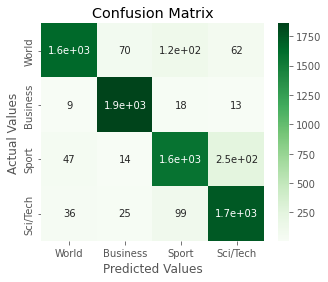

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4), )
sns.heatmap(cm_df, annot=True, cmap="Greens")
#sns.color_palette("mako", as_cmap=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

The accuracy index is well represented by the above confusion matrix

Even though our dataset is balanced, we would like to check also other metrics

In [ ]:
print(classification_report(Y_test.argmax(axis=1),prediction_classes))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1900
           1       0.94      0.98      0.96      1900
           2       0.87      0.83      0.85      1900
           3       0.84      0.92      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



### Test with 'raw - Title' variable

Now we try to evaluate the model only considering the titles from the test dataframe.

In [ ]:
X_test_title = df_test['Title']

In [ ]:
X_test_title

0                       Fears for T N pension after talks
1       The Race is On: Second Private Team Sets Launc...
2           Ky. Company Wins Grant to Study Peptides (AP)
3           Prediction Unit Helps Forecast Wildfires (AP)
4             Calif. Aims to Limit Farm-Related Smog (AP)
                              ...                        
7595                                     Around the world
7596                          Void is filled with Clement
7597                               Martinez leaves bitter
7598    5 of arthritis patients in Singapore take Bext...
7599                               EBay gets into rentals
Name: Title, Length: 7600, dtype: object

In [ ]:
X_test_title = tokenizer.texts_to_sequences(X_test_title)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

max_len = 50

X_test_title = pad_sequences(X_test_title, padding = 'post', maxlen = max_len)

In [ ]:
score = model.evaluate(X_test_title, Y_test, verbose = 1)

238/238 [==============================] - 7s 28ms/step - loss: 0.6020 - categorical_accuracy: 0.7822


Even if the title variable has few words, the model still performs quite well.

## GRU

<div align= "center"><img src="https://media.giphy.com/media/13Iu9mjLpXF0ek/giphy.gif"></div>

Gated Recurrent Unit is a recurrent neural network which is similar to the LSTM but instead of using a cell state, it relies on hidden state to trasnfer info

Define Embedding layer using GloVe weights and a GRU layers with 100 neurons and at the last Dense layer with final neuron with 'softmax' activation.
Finally compile the model having 'categorical_crossentropy' as a loss function, 'adam' as an optimizer with 'categorical_accuracy' as a metric.

In [ ]:
max_len = 75
model = Sequential()
model.add(Embedding(len(word_index) + 1,
 100,
 weights=[embedding_matrix],
 input_length=max_len,
 trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(GRU(units=32, activation='tanh', recurrent_activation='sigmoid', stateful=False), name='Hidden-GRU-Encoder-Layer'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 75, 100)           7163000   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 75, 100)          0         
 lDropout1D)                                                     
                                                                 
 Hidden-GRU-Encoder-Layer (B  (None, 64)               25728     
 idirectional)                                                   
                                                                 
 dense_12 (Dense)            (None, 1024)              66560     
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 1024)             

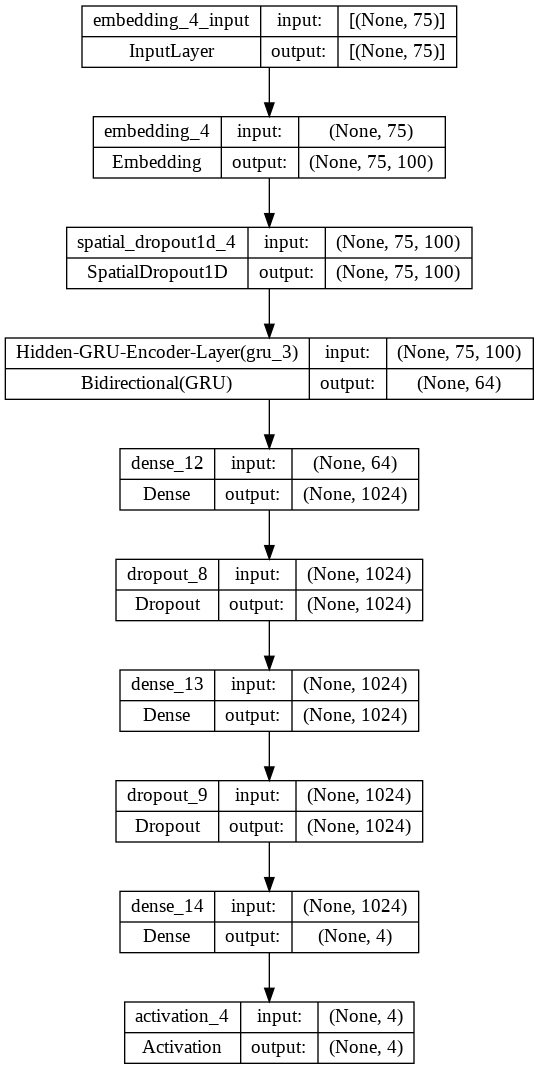

In [ ]:
# graphical representation of the model
plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 5, verbose = 1,validation_split = 0.2)

Epoch 1/5
750/750 [==============================] - 11s 9ms/step - loss: 0.4873 - categorical_accuracy: 0.8297 - val_loss: 0.3272 - val_categorical_accuracy: 0.8858
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 0.3843 - categorical_accuracy: 0.8744 - val_loss: 0.3115 - val_categorical_accuracy: 0.8878
Epoch 3/5
750/750 [==============================] - 6s 8ms/step - loss: 0.3722 - categorical_accuracy: 0.8790 - val_loss: 0.3089 - val_categorical_accuracy: 0.8892
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 0.3604 - categorical_accuracy: 0.8821 - val_loss: 0.2996 - val_categorical_accuracy: 0.8898
Epoch 5/5
750/750 [==============================] - 6s 9ms/step - loss: 0.3495 - categorical_accuracy: 0.8847 - val_loss: 0.3120 - val_categorical_accuracy: 0.8825


In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1)

238/238 [==============================] - 1s 4ms/step - loss: 0.3100 - categorical_accuracy: 0.8892


In [ ]:
model.save("Model2.0")

####Model Performance Visualization using Matplotlib

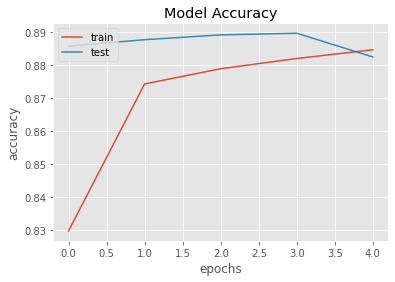

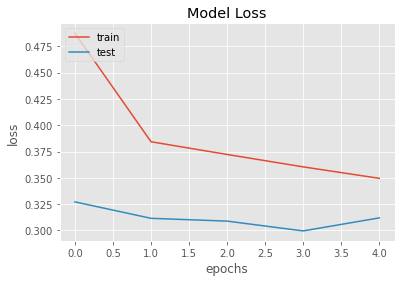

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

####Prediction Stage

In [ ]:


instance = "The Raiders got a last-minute gift from the Patriots, the Jaguars shocked the Cowboys in overtime, and the Lions aren’t out of surprises quite yet"
print(instance)

instance = tokenizer.texts_to_sequences(instance)

flat_list = []

for sublist in instance :
    for item in sublist :
        flat_list.append(item)
        
flat_list = [flat_list]

flat_list = pad_sequences(flat_list, padding = 'post', maxlen = max_len)
print(model.predict(flat_list))
topic_index = np.argmax(model.predict(flat_list))

def topic(topic):
  if topic == 0:
    return print('The topic is World')
  elif topic == 1:
    return print('The topic is Sport')
  elif topic == 2:
    return print('The topic is Business')
  else: 
    return print('The topic is Sci-Tech')

topic(topic_index)

The Raiders got a last-minute gift from the Patriots, the Jaguars shocked the Cowboys in overtime, and the Lions aren’t out of surprises quite yet
1/1 [==============================] - 1s 583ms/step
[[0.00823605 0.01023483 0.07507769 0.90645146]]
1/1 [==============================] - 0s 16ms/step
The topic is Sci-Tech


###Metrics

In [ ]:
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from drive.MyDrive.Text_Mining.utils import dataio, kerasutils, modelutils #Import from Drive

In [ ]:
import urllib
import sklearn
import logging
import os
import numpy as np
from seqeval.metrics import classification_report
#from utils import dataio, kerasutils, modelutils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
predictions = model.predict(X_test)
predictions

238/238 [==============================] - 1s 4ms/step


array([[3.6794592e-02, 2.0084088e-03, 8.7741184e-01, 8.3785221e-02],
       [5.5832986e-02, 3.6954302e-02, 3.3205327e-02, 8.7400746e-01],
       [1.1929531e-02, 8.9879322e-04, 2.2686464e-01, 7.6030707e-01],
       ...,
       [3.6769085e-02, 9.5995486e-01, 1.6206106e-03, 1.6554429e-03],
       [6.7656167e-02, 8.8626641e-04, 8.4358227e-01, 8.7875351e-02],
       [3.2440023e-03, 7.4329553e-05, 2.3193559e-01, 7.6474613e-01]],
      dtype=float32)

In [ ]:
prediction_classes=np.argmax(predictions,axis=1)
prediction_classes

array([2, 3, 3, ..., 1, 2, 3])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cf_matrix = confusion_matrix(Y_test.argmax(axis=1),prediction_classes)

In [ ]:
cm_df = pd.DataFrame(cf_matrix, index = ['World','Business','Sport','Sci/Tech'],
                     columns = ['World','Business','Sport','Sci/Tech'])

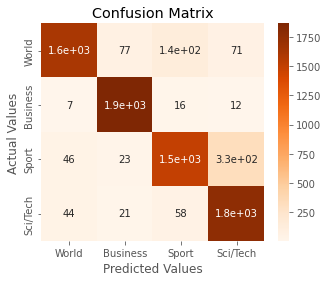

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4), )
sns.heatmap(cm_df, annot=True, cmap="Oranges")
#sns.color_palette("mako", as_cmap=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(classification_report(Y_test.argmax(axis=1),prediction_classes))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1900
           1       0.94      0.98      0.96      1900
           2       0.88      0.79      0.83      1900
           3       0.81      0.94      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



### Test with 'raw - Title' variable

In [ ]:
X_test_title = df_test['Title']

In [ ]:
X_test_title

0                       Fears for T N pension after talks
1       The Race is On: Second Private Team Sets Launc...
2           Ky. Company Wins Grant to Study Peptides (AP)
3           Prediction Unit Helps Forecast Wildfires (AP)
4             Calif. Aims to Limit Farm-Related Smog (AP)
                              ...                        
7595                                     Around the world
7596                          Void is filled with Clement
7597                               Martinez leaves bitter
7598    5 of arthritis patients in Singapore take Bext...
7599                               EBay gets into rentals
Name: Title, Length: 7600, dtype: object

In [ ]:
X_test_title = tokenizer.texts_to_sequences(X_test_title)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

max_len = 50

X_test_title = pad_sequences(X_test_title, padding = 'post', maxlen = max_len)

In [ ]:
score = model.evaluate(X_test_title, Y_test, verbose = 1)

238/238 [==============================] - 2s 4ms/step - loss: 0.6190 - categorical_accuracy: 0.7749


#BERT

<div align= "center"><img src="https://media.giphy.com/media/MtmFbGJ6YsUEg/giphy.gif"></div>

**Bidirectional Encoder Representations from Transformers**

Designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left left and right context


In [ ]:
!pip install -q transformers datasets

     |████████████████████████████████| 5.8 MB 29.8 MB/s 
     |████████████████████████████████| 452 kB 75.5 MB/s 
     |████████████████████████████████| 182 kB 72.8 MB/s 
     |████████████████████████████████| 7.6 MB 63.4 MB/s 
     |████████████████████████████████| 132 kB 69.9 MB/s 
     |████████████████████████████████| 212 kB 78.9 MB/s 
     |████████████████████████████████| 127 kB 67.5 MB/s 


In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
# rename the columns name
df_train = df_train.rename(columns = {'Topic' : 'label', 'Text Cleaned' : 'text_cleaned'})
df_test = df_test.rename(columns = {'Topic' : 'label', 'Text Cleaned' : 'text_cleaned'})

# split dataframe into Train, Test and Validation
bert_train = df_train[['label', 'text_cleaned']][:96000] 
bert_validation = df_train[['label', 'text_cleaned']][96000:] #20% of df_train
bert_test = df_test[['label', 'text_cleaned']]

In [ ]:
bert_train.tail()

,label,text_cleaned
95995,4,jak trades master fun late installment playsta...
95996,4,advertiser muscle rss s escaping advertising m...
95997,4,stem cells feed brain tumors researcher discov...
95998,4,wisconsin invest stem cells californias state ...
95999,4,fossil find spain link great apes fossils ape ...


In [ ]:
bert_validation.head()

,label,text_cleaned
96000,4,run extra mile set humans apart primates world...
96001,2,harris miami upend florida anthony harris scor...
96002,4,evidence hints early human americas archaeolog...
96003,4,joseph weiss originator theory facing trauma d...
96004,1,aishwarya rai star hollywood blockbuster taj m...


In [ ]:
# trasform topic labels (1,2,3,4) into a (0,1) matrix
bert_train= pd.get_dummies(bert_train, columns = ['label'])
bert_validation= pd.get_dummies(bert_validation, columns = ['label'])
bert_test= pd.get_dummies(bert_test, columns = ['label'])

In [ ]:
bert_train.head()

,text_cleaned,label_1,label_2,label_3,label_4
0,wall st bears claw black shortsellers wall str...,0,0,1,0
1,carlyle look commercial aerospace private inve...,0,0,1,0
2,oil economy cloud stocks outlook soar crude pr...,0,0,1,0
3,iraq halts oil exports main southern pipeline ...,0,0,1,0
4,oil price soar alltime record pose new menace ...,0,0,1,0
...,...,...,...,...,...
95995,jak trades master fun late installment playsta...,0,0,0,1
95996,advertiser muscle rss s escaping advertising m...,0,0,0,1
95997,stem cells feed brain tumors researcher discov...,0,0,0,1
95998,wisconsin invest stem cells californias state ...,0,0,0,1


In [ ]:
bert_train = bert_train.rename(columns = {'label_1' : 'Word', 'label_2': 'Sport', 'label_3' : 'Business', 'label_4' : 'Sci-Tech'})
bert_validation = bert_validation.rename(columns = {'label_1' : 'Word', 'label_2': 'Sport', 'label_3' : 'Business', 'label_4' : 'Sci-Tech'})
bert_test = bert_test.rename(columns = {'label_1' : 'Word', 'label_2': 'Sport', 'label_3' : 'Business', 'label_4' : 'Sci-Tech'})

In [ ]:
bert_train.head()

,text_cleaned,Word,Sport,Business,Sci-Tech
0,wall st bears claw black shortsellers wall str...,0,0,1,0
1,carlyle look commercial aerospace private inve...,0,0,1,0
2,oil economy cloud stocks outlook soar crude pr...,0,0,1,0
3,iraq halts oil exports main southern pipeline ...,0,0,1,0
4,oil price soar alltime record pose new menace ...,0,0,1,0
...,...,...,...,...,...
95995,jak trades master fun late installment playsta...,0,0,0,1
95996,advertiser muscle rss s escaping advertising m...,0,0,0,1
95997,stem cells feed brain tumors researcher discov...,0,0,0,1
95998,wisconsin invest stem cells californias state ...,0,0,0,1


In [ ]:
# transform the dataframe into Dataset type
train = Dataset.from_pandas(bert_train)
validation = Dataset.from_pandas(bert_validation)
test = Dataset.from_pandas(bert_test)

In [ ]:
# create a DatasetDict object
dataset = DatasetDict({"train" : train, "validation" : validation, "test" : test})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text_cleaned', 'Word', 'Sport', 'Business', 'Sci-Tech'],
        num_rows: 96000
    })
    validation: Dataset({
        features: ['text_cleaned', 'Word', 'Sport', 'Business', 'Sci-Tech'],
        num_rows: 24000
    })
    test: Dataset({
        features: ['text_cleaned', 'Word', 'Sport', 'Business', 'Sci-Tech'],
        num_rows: 7600
    })
})

The dataset is splitted in Training, Validation and Testing 

In [ ]:
example = dataset['train'][0]
example

{'text_cleaned': 'wall st bears claw black shortsellers wall streets dwindle band ultracynic green',
 'Word': 0,
 'Sport': 0,
 'Business': 1,
 'Sci-Tech': 0}

In [ ]:
# labels in a list
labels = [label for label in dataset['train'].features.keys() if label not in ['text_cleaned']]
# create two opposite dictionaries
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['Word', 'Sport', 'Business', 'Sci-Tech']

Preprocess data

BERT's model does not expect a text as direct input, so we should using the text tokenizer. 

In [ ]:
from transformers import AutoTokenizer
import numpy as np

# load the automated tokenizer for BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["text_cleaned"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()
  
  return encoding

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# the primary purpose of map() is to speed up processing functions.
# it allaws you to apply a processing function to each example in a dataset.
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

  0%|          | 0/96 [00:00<?, ?ba/s]

  0%|          | 0/24 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
# print an example 
example = encoded_dataset['train'][0]
print(example.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [ ]:
tokenizer.decode(example['input_ids'])

'[CLS] wall st bears claw black shortsellers wall streets dwindle band ultracynic green [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
example['labels']

[0.0, 0.0, 1.0, 0.0]

In [ ]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['Business']

Finally, we set the format of our data to PyTorch tensors. This will turn the training, validation and test sets into standard PyTorch datasets.

In [ ]:
encoded_dataset.set_format("torch")

**Define Model**

import the pre-trained model to whom we will apply the fine tuning for our task.

In [ ]:
from transformers import AutoModelForSequenceClassification

# set the problem_type to be Multi label calssification to have the correct loss function for the task
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", 
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

** Train the model **

we are going to train the model using HuggingFace's Trainer API

In [ ]:
# set hyperparameters 
batch_size = 64
metric_name = "f1"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch
    
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

# compute metrics while training
def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

In [ ]:
encoded_dataset['train'][0]['labels'].type()

'torch.FloatTensor'

In [ ]:
encoded_dataset['train']['input_ids'][0]

tensor([  101,  2813,  2358,  6468, 15020,  2304,  9132, 24038,  2015,  2813,
         4534,  1040, 11101,  2571,  2316, 11087,  5666,  8713,  2665,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
#forward pass
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.8445, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[0.8791, 0.1036, 0.0073, 0.0448]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 96000
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 7500
  Number of trainable parameters = 109485316
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.118000,0.118463,0.915766,0.941910,0.907458
2,0.088900,0.107848,0.920093,0.945521,0.914083
3,0.068500,0.114907,0.918357,0.944514,0.913125
4,0.054000,0.126843,0.915922,0.943417,0.912292
5,0.039500,0.137755,0.914994,0.942903,0.911917


***** Running Evaluation *****
  Num examples = 24000
  Batch size = 64
Saving model checkpoint to bert-finetuned-sem_eval-english/checkpoint-1500
Configuration saved in bert-finetuned-sem_eval-english/checkpoint-1500/config.json
Model weights saved in bert-finetuned-sem_eval-english/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in bert-finetuned-sem_eval-english/checkpoint-1500/tokenizer_config.json
Special tokens file saved in bert-finetuned-sem_eval-english/checkpoint-1500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 24000
  Batch size = 64
Saving model checkpoint to bert-finetuned-sem_eval-english/checkpoint-3000
Configuration saved in bert-finetuned-sem_eval-english/checkpoint-3000/config.json
Model weights saved in bert-finetuned-sem_eval-english/checkpoint-3000/pytorch_model.bin
tokenizer config file saved in bert-finetuned-sem_eval-english/checkpoint-3000/tokenizer_config.json
Special tokens file saved in bert-finetuned-sem_eval-englis

TrainOutput(global_step=7500, training_loss=0.08003105443318685, metrics={'train_runtime': 10527.5321, 'train_samples_per_second': 45.595, 'train_steps_per_second': 0.712, 'total_flos': 3.157389361152e+16, 'train_loss': 0.08003105443318685, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 24000
  Batch size = 64


{'eval_loss': 0.10784795135259628,
 'eval_f1': 0.9200929006339841,
 'eval_roc_auc': 0.9455208333333334,
 'eval_accuracy': 0.9140833333333334,
 'eval_runtime': 186.558,
 'eval_samples_per_second': 128.646,
 'eval_steps_per_second': 2.01,
 'epoch': 5.0}

All the metrics state that BERT performs well.

## Inference 

We try to classify a real description taken from NY Times by using BERT model.

In [ ]:
text = "When mission controllers observed white particles spewing from a spacecraft that serves as a “lifeboat” for the International Space Station, they scrapped the mission."

encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [ ]:
logits = outputs.logits
logits.shape

torch.Size([1, 4])

In [ ]:
# apply sigmoid + threshold
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= 0.5)] = 1
# turn predicted id's into actual label names
predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)

['Sci-Tech']


The model was able to predict correctly Topic by using only the description of the article.

# Coclusion
---


- If we had not had the real labels we would had to use LDA method based on Title + Description, because it guesses correctly around 80% of the real labels.

- After trying several RNN models, we selected the two models (GRU and LSTM) whose prediction power and accuracy were better. 

- Lastly, by using BERT we saw it has a slightly better performance in the classification task.